## FraudStudy: A Hybrid Deep-learning model to detect fraudulent customers 

This is a hybrid engine combining two deep learning models; ANN and SOM (Self-Organizing Map) to detect fraud. Used SOM to locate the fraudulent customers and feed it in to ANN to identify the predicted probability ranking of fraud
customers. 
My goal was to determine the highest predicted probability of fraud. 
Dataset: Statlog(Aus. credit approval)

Motivation: To build an engine composed with supervised and unsupervised deep-learning models

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('datasets/FraudStudy/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [4]:
# Adding minsom to sys path 
import sys
sys.path.append('Resources/')


In [5]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

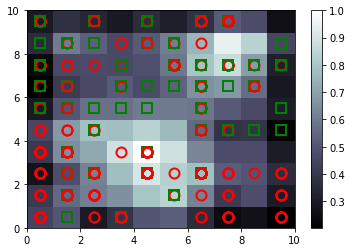

In [6]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [8]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate(( mappings[(4,3)], mappings[(4,2)]), axis = 0)
#frauds = mappings[(2,6)]
frauds = sc.inverse_transform(frauds)

In [9]:
# Going from Unsupervised to Supervised Deep Learning
# Creating the matrix of features
customers = dataset.iloc[:, 1:].values

# Creating the dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [11]:
# Initialising the ANN
classifier = Sequential()

In [12]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))


In [13]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [14]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [15]:
# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)


Epoch 1/2
690/690 [==============================] - 2s - loss: 0.3851 - acc: 0.9420     
Epoch 2/2
690/690 [==============================] - 1s - loss: 0.1380 - acc: 0.9420     


Why two Epochs? Due to the fact that dataset is so simple it has only few observations and features  

In [16]:
# Predicting the probabilities of frauds
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]
print(y_pred)

[[  1.56214230e+07   3.09634226e-04]
 [  1.57997850e+07   3.40640690e-04]
 [  1.56548590e+07   1.29661616e-03]
 ..., 
 [  1.55756050e+07   4.02694643e-01]
 [  1.56660960e+07   4.03012007e-01]
 [  1.56444530e+07   4.04834270e-01]]
